**Clustering of Vendor technologies**

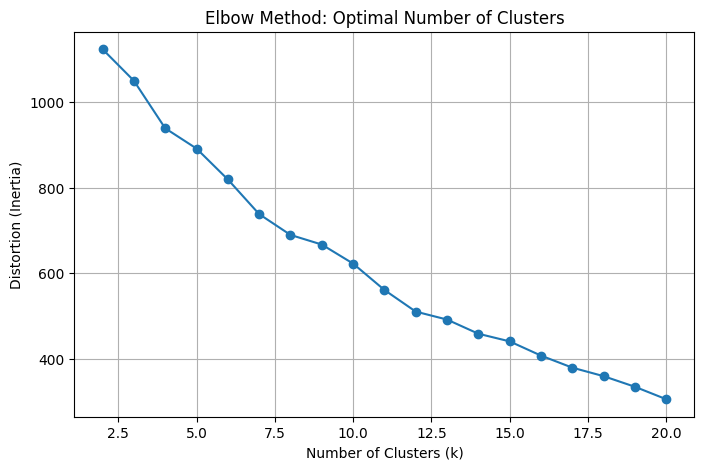

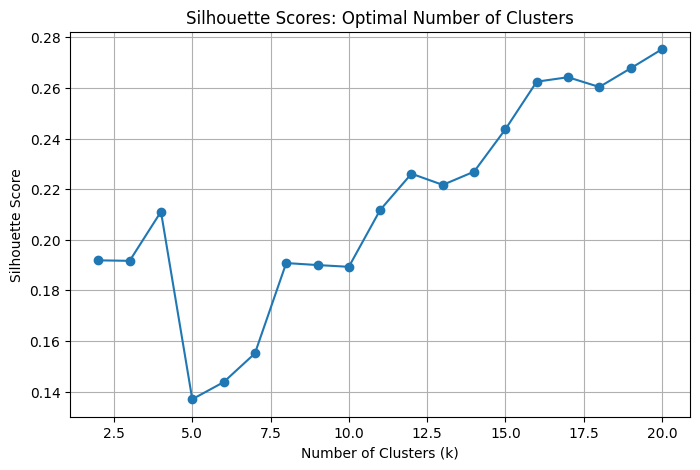

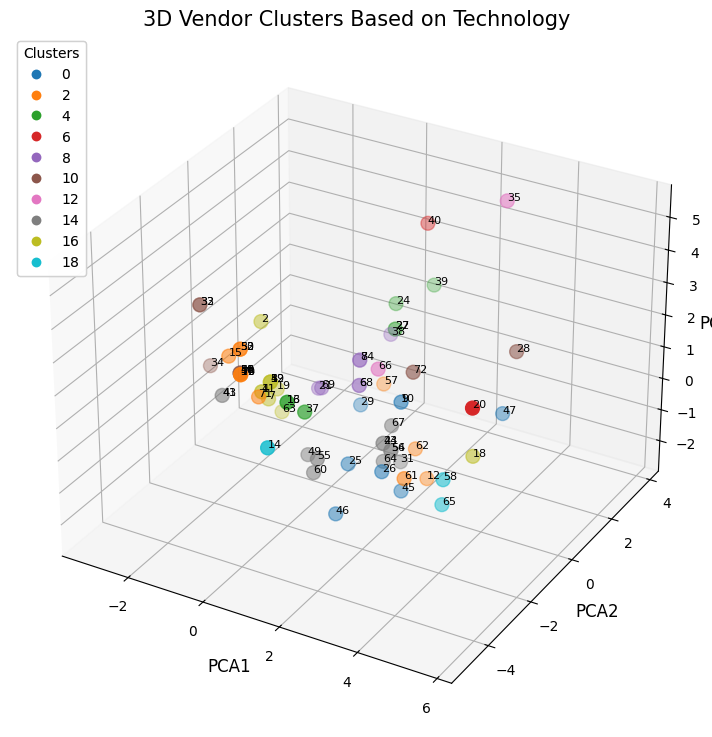

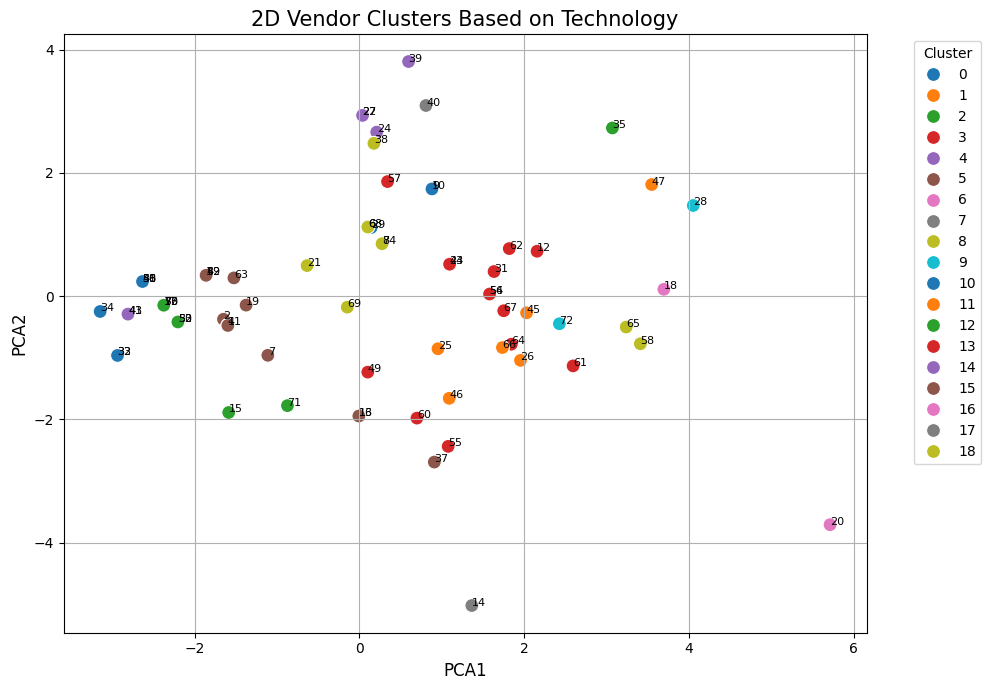

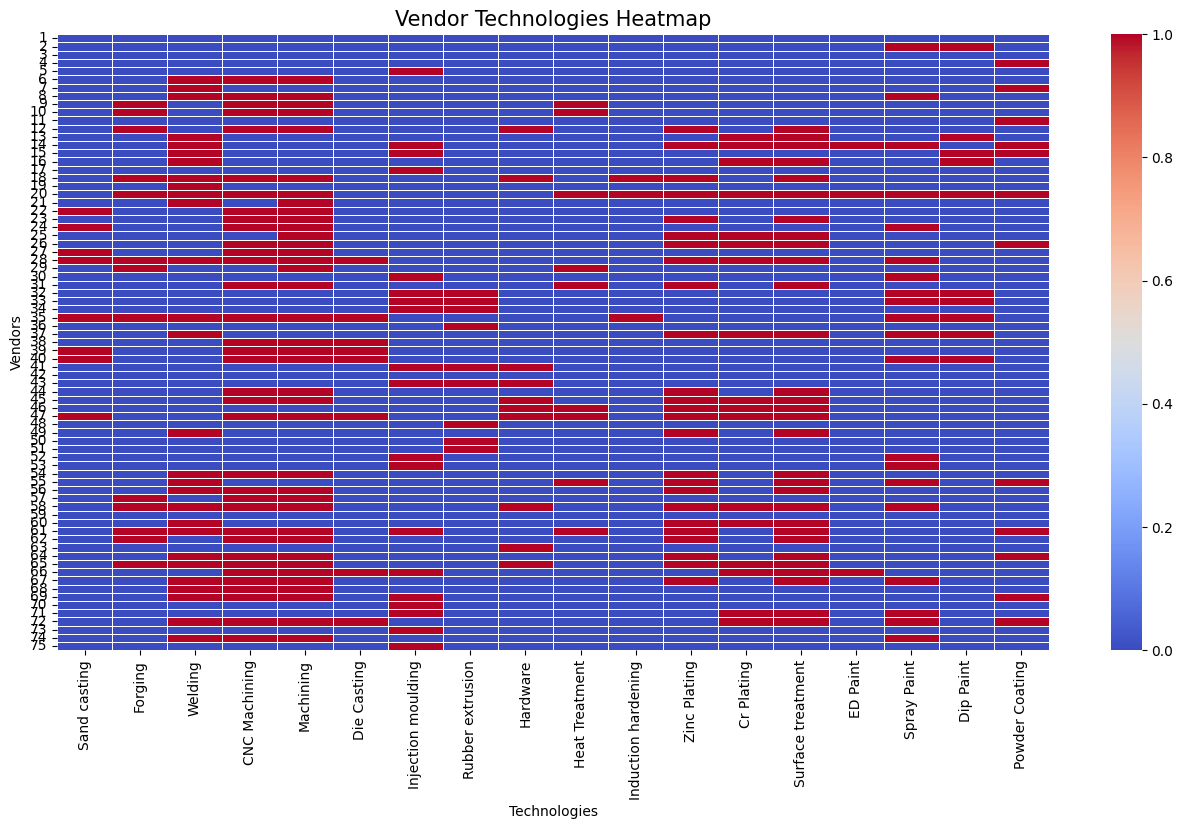

In [ ]:
# Clustering of Vendor technologies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load Vendor Database
VENDOR_DATABASE_FILE = "Vendor database3.xlsx"

def load_vendor_data():
    vendor_df = pd.read_excel(VENDOR_DATABASE_FILE, sheet_name='Vendor Capabilities')
    vendor_df = vendor_df.fillna("NO")  # Replace missing values
    return vendor_df

# Load data
vendor_df = load_vendor_data()

# Extract vendor names and technology features
vendors = vendor_df.iloc[:, 0]  # Vendor names
tech_data = vendor_df.iloc[:, 3:]  # Technology features

# Preprocess the data
scaler = StandardScaler()
tech_data_scaled = scaler.fit_transform(tech_data)

# Determine optimal clusters using the Elbow Method
distortions = []
silhouette_scores = []
k_range = range(2, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tech_data_scaled)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(tech_data_scaled, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, distortions, marker='o')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores: Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

# Set optimal clusters (replace with the chosen number from the plots)
n_clusters = 19
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
vendor_df['Cluster'] = kmeans.fit_predict(tech_data_scaled)

# Dimensionality Reduction (PCA to 3 components)
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(tech_data_scaled)
vendor_df['PCA1'] = reduced_data[:, 0]
vendor_df['PCA2'] = reduced_data[:, 1]
vendor_df['PCA3'] = reduced_data[:, 2]

# 3D Visualization
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    vendor_df['PCA1'], vendor_df['PCA2'], vendor_df['PCA3'],
    c=vendor_df['Cluster'], cmap='tab10', s=100
)

for i, vendor in enumerate(vendors):
    ax.text(vendor_df['PCA1'][i], vendor_df['PCA2'][i], vendor_df['PCA3'][i], vendor, fontsize=8)

ax.set_title("3D Vendor Clusters Based on Technology", fontsize=15)
ax.set_xlabel("PCA1", fontsize=12)
ax.set_ylabel("PCA2", fontsize=12)
ax.set_zlabel("PCA3", fontsize=12)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc="upper left")
ax.add_artist(legend1)

plt.show()

# Re-run 2D visualization using already processed data
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure PCA was successfully applied
if 'PCA1' in vendor_df and 'PCA2' in vendor_df:
    # 2D Scatter Plot
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x='PCA1', y='PCA2', hue='Cluster', data=vendor_df, palette='tab10', s=100
    )

    # Annotate each point with vendor names
    for i, vendor in enumerate(vendors):
        plt.text(vendor_df['PCA1'][i], vendor_df['PCA2'][i], str(vendor), fontsize=8)

    # Add axis labels and title
    plt.title("2D Vendor Clusters Based on Technology", fontsize=15)
    plt.xlabel("PCA1", fontsize=12)
    plt.ylabel("PCA2", fontsize=12)
    plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print("PCA columns not found. Ensure PCA has been applied successfully.")

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'tech_data' is a DataFrame with vendors as rows and technologies as columns
plt.figure(figsize=(16, 8))
sns.heatmap(tech_data, cmap='coolwarm', cbar=True, xticklabels=True, yticklabels=vendors, linewidths=0.5)

plt.title("Vendor Technologies Heatmap", fontsize=15)
plt.xlabel("Technologies")
plt.ylabel("Vendors")
plt.show()

**Process-to-Technology Mapping**

**Iteration 1** (Lllama, Qwen, Gpt-Neo, Custom Gpt)

**Llama-3.1-70b**

In [4]:
%%capture
!pip install groq

In [ ]:
import os
import pandas as pd
import logging
from google.colab import drive
from groq import Groq

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_folder = "/content/drive/My Drive/Tools Project/"
os.makedirs(base_folder, exist_ok=True)  # Ensure the folder exists

# Define file paths
training_file = os.path.join(base_folder, "json v5 - Copy.xlsx")  # Training data
input_file = os.path.join(base_folder, "test v1.xlsx")  # Input process file
output_file = os.path.join(base_folder, "llama-3.1-70b_predictions.xlsx")  # Output file
log_file = os.path.join(base_folder, "llama_ai_generation_log.txt")  # Log file

# Set the Groq API key
os.environ["GROQ_API_KEY"] = "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"

# Initialize the Groq client
client = Groq()
DEFAULT_MODEL = "llama-3.1-70b-versatile"

# Configure logging
logging.basicConfig(
    filename=log_file,
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)
logging.info("Logging started for AI technology mapping.")

# Load the training examples from Excel
df = pd.read_excel(training_file)

# Ensure correct columns in the Excel file
expected_columns = ['Process', 'Technology', 'Reasoning for Technologies']
if not all(col in df.columns for col in expected_columns):
    raise ValueError(f"Excel file must contain the following columns: {expected_columns}")

# Create the few-shot prompt with examples
def create_few_shot_prompt(df):
    unique_technologies = df['Technology'].unique()
    technology_list = ", ".join(unique_technologies)

    prompt = (
        "You are an AI expert in process-to-technology mapping. "
        "Given a manufacturing process, provide only the single most suitable technology from the following list.\n\n"
        f"Available Technologies: {technology_list}\n\n"
        "Respond with the technology name only. Do not include any other text.\n\n"
    )

    for _, row in df.iterrows():
        process = row['Process']
        technology = row['Technology']
        reasoning = row['Reasoning for Technologies']
        prompt += f"Process: {process}\nTechnology: {technology}\nReasoning: {reasoning}\n\n"

    return prompt

# Function to generate technology mapping
def generate_technologies_from_file(input_file, model=DEFAULT_MODEL):
    # Load the process list from the input Excel file
    input_df = pd.read_excel(input_file)

    # Ensure the input file contains a "Process" column
    if 'Process' not in input_df.columns:
        raise ValueError("The input file must contain a column named 'Process'.")

    process_list = input_df['Process'].tolist()

    # Create the few-shot prompt
    prompt = create_few_shot_prompt(df)
    results = []

    for process_name in process_list:
        current_prompt = prompt + f"Process: {process_name}\nTechnology:"
        try:
            # Call the Groq API to generate the response
            response = client.chat.completions.create(
                messages=[{"role": "user", "content": current_prompt}],
                model=model,
                temperature=0.2,
                max_tokens=10,
                top_p=0.9
            )

            # Extract the generated technology (clean response)
            generated_text = response.choices[0].message.content.strip()
            technology = generated_text.split("\n")[0].replace("Process:", "").strip()
            results.append({"Process": process_name, "Technology": technology})

            # Log the input and output
            logging.info(f"Input Process: {process_name}")
            logging.info(f"Generated Prompt: {current_prompt}")
            logging.info(f"AI Response: {generated_text}")

        except Exception as e:
            error_message = f"Error: {e}"
            results.append({"Process": process_name, "Technology": error_message})

            # Log the error
            logging.error(f"Error for Process '{process_name}': {e}")

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Generate technologies from the input file
predicted_technologies_df = generate_technologies_from_file(input_file)

# Save the results to an Excel file in Google Drive
predicted_technologies_df.to_excel(output_file, index=False)

# Notify the user and print logs
print(f"Technology mappings saved to: {output_file}")
print(f"Logs have been saved to: {log_file}")
print(predicted_technologies_df)


Mounted at /content/drive
Technology mappings saved to: /content/drive/My Drive/Tools Project/llama-3.1-70b_predictions.xlsx
Logs have been saved to: /content/drive/My Drive/Tools Project/llama_ai_generation_log.txt
                     Process      Technology
0                 Chamfering   CNC Machining
1                     Boring   CNC Machining
2              Teeth Cutting       Machining
3                   Grooving       Machining
4             Anodic Cleaner    Zinc Plating
..                       ...             ...
101  Cathodic Electrocoating    Zinc Plating
102             Powder Spray  Powder Coating
103       Immersion Painting       Dip Paint
104                  Dipping    Zinc Plating
105         Flow Dip Coating    Zinc Plating

[106 rows x 2 columns]


**Qwen2.5-1.5b**

In [ ]:
%%capture
!pip install transformers torch pandas


In [ ]:
import os
import pandas as pd
import logging
from google.colab import drive
from transformers import AutoTokenizer, AutoModelForCausalLM

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_folder = "/content/drive/My Drive/Tools Project/"
os.makedirs(base_folder, exist_ok=True)  # Ensure the folder exists

# Define file paths
training_file = os.path.join(base_folder, "json v5 - Copy.xlsx")  # Training data
input_file = os.path.join(base_folder, "test v1.xlsx")  # Input process file
output_file = os.path.join(base_folder, "qwen_predictions.xlsx")  # Output file
log_file = os.path.join(base_folder, "qwen_ai_log.txt")  # Log file

# Configure logging
logging.basicConfig(
    filename=log_file,
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)
logging.info("Logging started for Qwen AI technology mapping.")

# Load the Qwen model and tokenizer once
model_path = "Qwen/Qwen2.5-1.5B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path)

# Ensure `pad_token` is set to avoid ambiguity
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Load the training examples from Excel
df = pd.read_excel(training_file)

# Ensure correct columns in the Excel file
expected_columns = ['Process', 'Technology', 'Reasoning for Technologies']
if not all(col in df.columns for col in expected_columns):
    raise ValueError(f"Excel file must contain the following columns: {expected_columns}")

# Create the few-shot prompt with examples
def create_few_shot_prompt(df):
    unique_technologies = df['Technology'].unique()
    technology_list = ", ".join(unique_technologies)

    prompt = (
        "You are an AI expert in process-to-technology mapping. "
        "Given a manufacturing process, provide only the single most suitable technology from the following list.\n\n"
        f"Available Technologies: {technology_list}\n\n"
        "Respond with the technology name only. Do not include any other text.\n\n"
    )

    for _, row in df.iterrows():
        process = row['Process']
        technology = row['Technology']
        prompt += f"Process: {process}\nTechnology: {technology}\n\n"

    return prompt

# Query the Qwen model
def query_qwen_local(prompt, process_name):
    try:
        # Modify prompt to include the new process
        current_prompt = prompt + f"Process: {process_name}\nTechnology:"

        # Tokenize the input prompt with attention mask
        inputs = tokenizer(current_prompt, return_tensors="pt", padding=True)

        # Generate response with max_new_tokens
        output_ids = model.generate(
            inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_new_tokens=10,
            temperature=0.5,
            do_sample=False
        )

        # Decode the output tokens
        output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        # Extract only the technology name by removing the prompt
        technology = output_text.replace(current_prompt, "").strip().split("\n")[0]

        # Log the input and output
        logging.info(f"Input Process: {process_name}")
        logging.info(f"Generated Prompt: {current_prompt}")
        logging.info(f"AI Response: {technology}")

        return technology
    except Exception as e:
        logging.error(f"Error for Process '{process_name}': {e}")
        return f"Error: {e}"

# Generate predictions for processes
def generate_technologies_from_file(input_file):
    # Load the process list from the input Excel file
    input_df = pd.read_excel(input_file)

    # Ensure the input file contains a "Process" column
    if 'Process' not in input_df.columns:
        raise ValueError("The input file must contain a column named 'Process'.")

    process_list = input_df['Process'].tolist()

    # Create the few-shot prompt
    prompt = create_few_shot_prompt(df)
    results = []

    for process_name in process_list:
        technology = query_qwen_local(prompt, process_name)
        results.append({"Process": process_name, "Technology": technology})

    return pd.DataFrame(results)

# Generate technologies from the input file
predicted_technologies_df = generate_technologies_from_file(input_file)

# Save the results to an Excel file in Google Drive
predicted_technologies_df.to_excel(output_file, index=False)

# Notify the user and print results
print(f"Technology mappings saved to: {output_file}")
print(f"Logs have been saved to: {log_file}")
print(predicted_technologies_df)


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:650: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `20` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


Technology mappings saved to: /content/drive/My Drive/Tools Project/qwen_predictions.xlsx
Logs have been saved to: /content/drive/My Drive/Tools Project/qwen_ai_log.txt
                     Process     Technology
0                 Chamfering  CNC Machining
1                     Boring  CNC Machining
2              Teeth Cutting   Zinc Plating
3                   Grooving  CNC Machining
4             Anodic Cleaner   Zinc Plating
..                       ...            ...
101  Cathodic Electrocoating   Zinc Plating
102             Powder Spray   Zinc Plating
103       Immersion Painting   Zinc Plating
104                  Dipping   Zinc Plating
105         Flow Dip Coating   Zinc Plating

[106 rows x 2 columns]


**GPT-Neo-1.3B**

In [ ]:
import os
import pandas as pd
import logging
from google.colab import drive
from transformers import AutoTokenizer, AutoModelForCausalLM

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_folder = "/content/drive/My Drive/Tools Project/"
os.makedirs(base_folder, exist_ok=True)  # Ensure the folder exists

# Define file paths
training_file = os.path.join(base_folder, "json v5 - Copy.xlsx")  # Training data
input_file = os.path.join(base_folder, "test v1.xlsx")  # Input process file
output_file = os.path.join(base_folder, "gpt_neo_1_3b_predictions.xlsx")  # Output file
log_file = os.path.join(base_folder, "gpt_neo_ai_log.txt")  # Log file

# Configure logging
logging.basicConfig(
    filename=log_file,
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)
logging.info("Logging started for GPT-Neo-1.3B AI technology mapping.")

# Load the GPT-Neo-1.3B model and tokenizer once
model_path = "EleutherAI/gpt-neo-1.3B"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForCausalLM.from_pretrained(model_path)

# Ensure `pad_token` is set to avoid ambiguity
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Load the training examples from Excel
df = pd.read_excel(training_file)

# Ensure correct columns in the Excel file
expected_columns = ['Process', 'Technology', 'Reasoning for Technologies']
if not all(col in df.columns for col in expected_columns):
    raise ValueError(f"Excel file must contain the following columns: {expected_columns}")

# Create the few-shot prompt with examples
def create_few_shot_prompt(df):
    unique_technologies = df['Technology'].unique()
    technology_list = ", ".join(unique_technologies)

    prompt = (
        "You are an AI expert in process-to-technology mapping. "
        "Given a manufacturing process, provide only the single most suitable technology from the following list.\n\n"
        f"Available Technologies: {technology_list}\n\n"
        "Respond with the technology name only. Do not include any other text.\n\n"
    )

    for _, row in df.iterrows():
        process = row['Process']
        technology = row['Technology']
        prompt += f"Process: {process}\nTechnology: {technology}\n\n"

    return prompt

# Query the GPT-Neo-1.3B model
def query_gpt_neo_local(prompt, process_name):
    try:
        # Insert the process name into the prompt
        current_prompt = prompt + f"Process: {process_name}\nTechnology:"

        # Tokenize the input prompt
        inputs = tokenizer(current_prompt, return_tensors="pt", padding=True)

        # Generate response with explicit `pad_token_id` and `attention_mask`
        output_ids = model.generate(
            inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_new_tokens=10,
            temperature=0.1,
            do_sample=False,
            pad_token_id=tokenizer.eos_token_id
        )

        # Decode the output tokens
        output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

        # Extract only the technology name by removing the prompt
        technology = output_text.replace(current_prompt, "").strip().split("\n")[0]

        # Log the input and output
        logging.info(f"Input Process: {process_name}")
        logging.info(f"Generated Prompt: {current_prompt}")
        logging.info(f"AI Response: {technology}")

        return technology
    except Exception as e:
        logging.error(f"Error for Process '{process_name}': {e}")
        return f"Error: {e}"

# Generate predictions for processes
def generate_technologies_from_file(input_file):
    # Load the process list from the input Excel file
    input_df = pd.read_excel(input_file)

    # Ensure the input file contains a "Process" column
    if 'Process' not in input_df.columns:
        raise ValueError("The input file must contain a column named 'Process'.")

    process_list = input_df['Process'].tolist()

    # Create the few-shot prompt
    prompt = create_few_shot_prompt(df)
    results = []

    for process_name in process_list:
        technology = query_gpt_neo_local(prompt, process_name)
        results.append({"Process": process_name, "Technology": technology})

    return pd.DataFrame(results)

# Generate technologies from the input file
predicted_technologies_df = generate_technologies_from_file(input_file)

# Save the results to an Excel file in Google Drive
predicted_technologies_df.to_excel(output_file, index=False)

# Notify the user and print results
print(f"Technology mappings saved to: {output_file}")
print(f"Logs have been saved to: {log_file}")
print(predicted_technologies_df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.1` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Technology mappings saved to: /content/drive/My Drive/Tools Project/gpt_neo_1_3b_predictions.xlsx
Logs have been saved to: /content/drive/My Drive/Tools Project/gpt_neo_ai_log.txt
                     Process    Technology
0                 Chamfering  Zinc Plating
1                     Boring   Die casting
2              Teeth Cutting   Die casting
3                   Grooving  Zinc Plating
4             Anodic Cleaner     Dip Paint
..                       ...           ...
101  Cathodic Electrocoating      ED Paint
102             Powder Spray  Powder Spray
103       Immersion Painting     Dip Paint
104                  Dipping     Dip Paint
105         Flow Dip Coating     Dip Paint

[106 rows x 2 columns]


**Evaluation (Custom GPT, Llama, Qwen, GPT-Neo)**

For Iteration 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Comparison results saved to: /content/drive/My Drive/Tools Project/comparison_results.xlsx

Classification Report for Llama:

                     precision    recall  f1-score   support

      CNC Machining       0.67      0.67      0.67         9
         Cr Plating       1.00      0.33      0.50         3
        Die Casting       1.00      1.00      1.00         3
          Dip Paint       1.00      0.50      0.67         4
           ED Paint       0.00      0.00      0.00         3
            Forging       0.83      1.00      0.91         5
           Hardware       0.50      0.20      0.29         5
     Heat Treatment       0.00      0.00      0.00        10
     Heat treatment       0.10      1.00      0.18         1
Induction Hardening       1.00      1.00      1.00         2
 Injection Moulding       1.00      0.75      0.86         4
          Ma

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


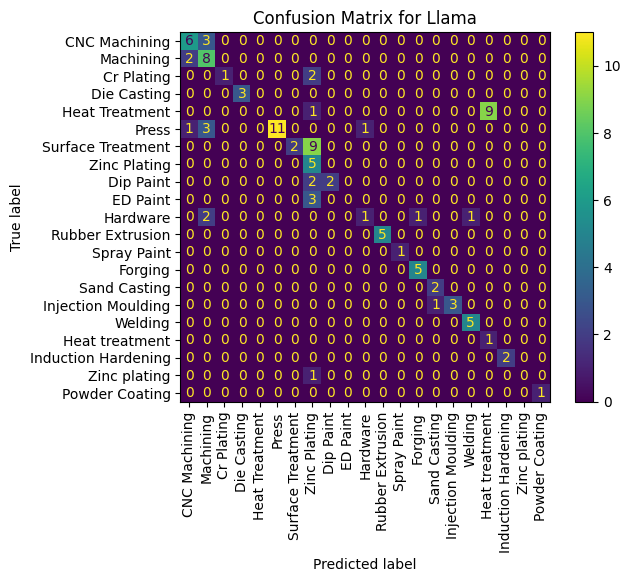


Classification Report for Qwen:

                     precision    recall  f1-score   support

           Blanking       0.00      0.00      0.00         0
      CNC Machining       0.50      0.78      0.61         9
         Cr Plating       0.00      0.00      0.00         3
        Die Casting       0.60      1.00      0.75         3
          Dip Paint       0.00      0.00      0.00         4
           ED Paint       0.00      0.00      0.00         3
            Forging       1.00      0.20      0.33         5
           Hardware       1.00      0.20      0.33         5
     Heat Treatment       0.00      0.00      0.00        10
     Heat treatment       0.00      0.00      0.00         1
Induction Hardening       0.00      0.00      0.00         2
 Injection Moulding       1.00      0.50      0.67         4
          Machining       0.00      0.00      0.00        10
     Powder Coating       0.00      0.00      0.00         1
              Press       0.00      0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

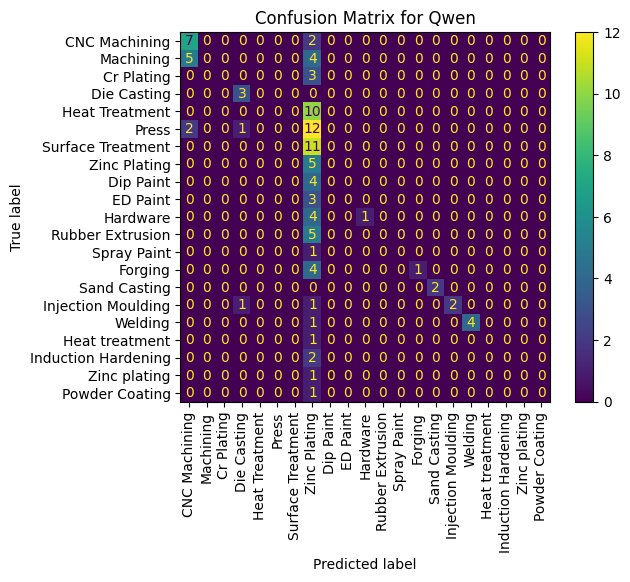


Classification Report for GPT-Neo:

                        precision    recall  f1-score   support

         CNC Machining       1.00      0.22      0.36         9
           CNC Turning       0.00      0.00      0.00         0
      Chemical Etching       0.00      0.00      0.00         0
        Counter-inking       0.00      0.00      0.00         0
         Counterboring       0.00      0.00      0.00         0
            Cr Plating       0.00      0.00      0.00         3
           Die Casting       0.67      0.67      0.67         3
           Die casting       0.00      0.00      0.00         0
             Dip Paint       0.75      0.75      0.75         4
              ED Paint       1.00      1.00      1.00         3
          Flow Coating       0.00      0.00      0.00         0
               Forging       1.00      0.40      0.57         5
              Hardware       0.67      0.40      0.50         5
        Heat Treatment       0.00      0.00      0.00        10
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

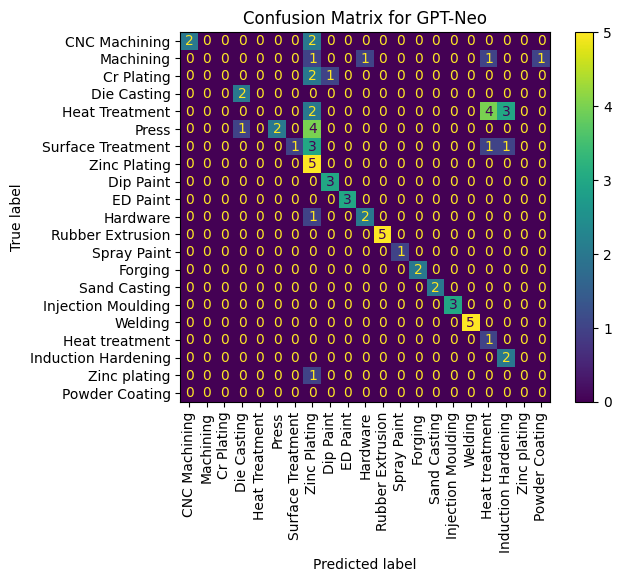


Classification Report for Custom GPT:

                     precision    recall  f1-score   support

      CNC Machining       0.54      0.78      0.64         9
         Cr Plating       1.00      1.00      1.00         3
        Die Casting       0.50      0.33      0.40         3
          Dip Paint       0.67      0.50      0.57         4
           ED Paint       0.67      0.67      0.67         3
            Forging       0.80      0.80      0.80         5
           Hardware       0.67      0.80      0.73         5
     Heat Treatment       0.80      0.80      0.80        10
     Heat treatment       0.00      0.00      0.00         1
Induction Hardening       0.50      0.50      0.50         2
 Injection Moulding       0.67      0.50      0.57         4
          Machining       0.80      0.40      0.53        10
     Powder Coating       0.00      0.00      0.00         1
              Press       0.93      0.88      0.90        16
   Rubber Extrusion       0.80      0.80    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

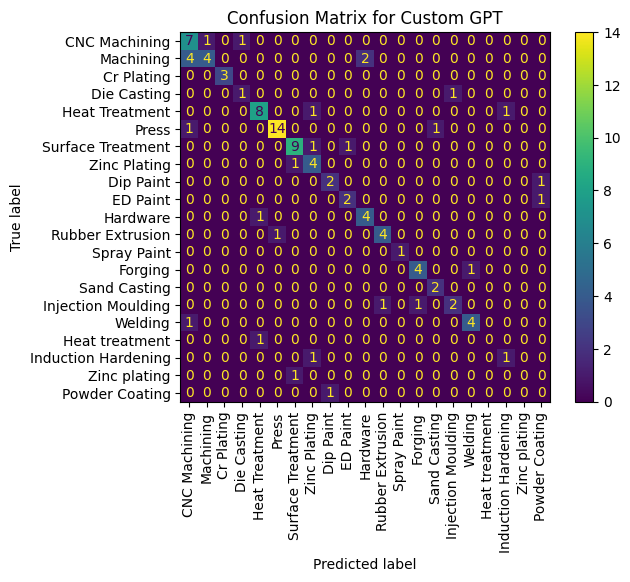

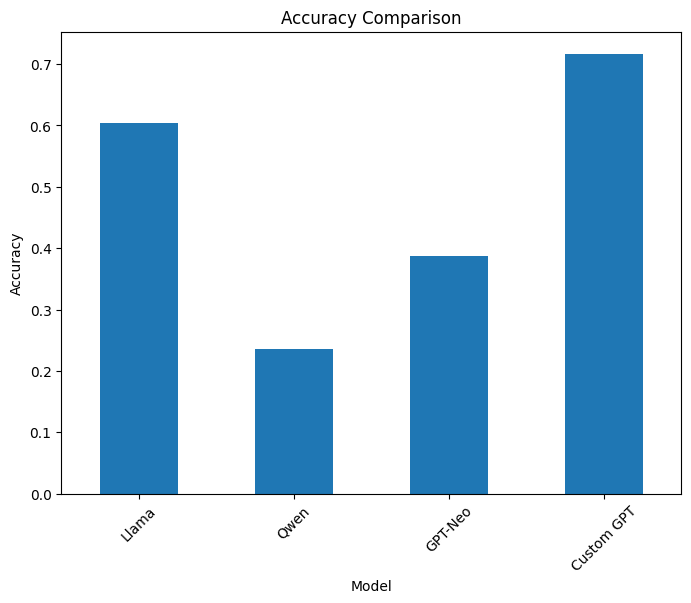

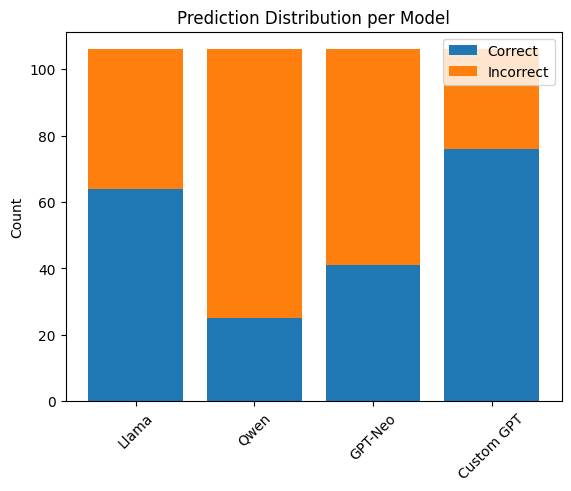

Metrics saved to: /content/drive/My Drive/Tools Project/model_metrics.xlsx


In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set base directory in Google Drive
base_folder = "/content/drive/My Drive/Tools Project/"
os.makedirs(base_folder, exist_ok=True)  # Ensure the folder exists

# Define file paths
llama_file = os.path.join(base_folder, "llama-3.1-70b_predictions.xlsx")
qwen_file = os.path.join(base_folder, "qwen_predictions.xlsx")
gpt_neo_file = os.path.join(base_folder, "gpt_neo_1_3b_predictions.xlsx")
custom_gpt_file = os.path.join(base_folder, "custom_gpt_predictions.xlsx")
ground_truth_file = os.path.join(base_folder, "ground_truth.xlsx")

# Load all dataframes
llama_df = pd.read_excel(llama_file)
qwen_df = pd.read_excel(qwen_file)
gpt_neo_df = pd.read_excel(gpt_neo_file)
custom_gpt_df = pd.read_excel(custom_gpt_file)
ground_truth_df = pd.read_excel(ground_truth_file)

# Merge all dataframes on the 'Process' column
comparison_df = ground_truth_df.copy()
comparison_df = comparison_df.merge(llama_df, on="Process", how="left", suffixes=("", "_Llama"))
comparison_df = comparison_df.merge(qwen_df, on="Process", how="left", suffixes=("", "_Qwen"))
comparison_df = comparison_df.merge(gpt_neo_df, on="Process", how="left", suffixes=("", "_GPT_Neo"))
comparison_df = comparison_df.merge(custom_gpt_df, on="Process", how="left", suffixes=("", "_Custom"))

# Rename columns for clarity
comparison_df.columns = [
    "Process",
    "Ground Truth",
    "Llama Prediction",
    "Qwen Prediction",
    "GPT-Neo Prediction",
    "Custom GPT Prediction",
]

# Save merged file for reference
merged_file = os.path.join(base_folder, "comparison_results.xlsx")
comparison_df.to_excel(merged_file, index=False)
print(f"Comparison results saved to: {merged_file}")

# Metrics dictionary
metrics = {}

# Calculate metrics for each model
for model in ["Llama", "Qwen", "GPT-Neo", "Custom GPT"]:
    predictions = comparison_df[f"{model} Prediction"]
    ground_truth = comparison_df["Ground Truth"]

    # Convert both ground_truth and predictions to strings
    ground_truth = ground_truth.astype(str)
    predictions = predictions.astype(str)  # Convert predictions to strings as well

    # Accuracy
    accuracy = accuracy_score(ground_truth, predictions)
    metrics[model] = {"Accuracy": accuracy}

    # Generate classification report
    print(f"\nClassification Report for {model}:\n")
    print(classification_report(ground_truth, predictions))

    # Confusion Matrix
    cm = confusion_matrix(ground_truth, predictions, labels=ground_truth.unique())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ground_truth.unique())
    disp.plot(cmap="viridis", xticks_rotation=90)
    plt.title(f"Confusion Matrix for {model}")
    plt.show()

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics).T

# Bar plot for accuracy
metrics_df["Accuracy"].plot(kind="bar", figsize=(8, 6), title="Accuracy Comparison", rot=45)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

# Add a correctness column for each model
for model in ["Llama", "Qwen", "GPT-Neo", "Custom GPT"]:
    comparison_df[f"{model} Correct"] = comparison_df[f"{model} Prediction"] == comparison_df["Ground Truth"]

# Correct and Incorrect Counts
correct_counts = {model: comparison_df[f"{model} Correct"].sum() for model in ["Llama", "Qwen", "GPT-Neo", "Custom GPT"]}
incorrect_counts = {model: len(comparison_df) - count for model, count in correct_counts.items()}

# Bar chart for correct vs incorrect predictions
labels = ["Correct", "Incorrect"]
x = range(len(correct_counts))

plt.bar(x, correct_counts.values(), label="Correct")
plt.bar(x, incorrect_counts.values(), bottom=list(correct_counts.values()), label="Incorrect")
plt.xticks(x, correct_counts.keys(), rotation=45)
plt.title("Prediction Distribution per Model")
plt.ylabel("Count")
plt.legend()
plt.show()

# Save metrics to file
metrics_file = os.path.join(base_folder, "model_metrics.xlsx")
metrics_df.to_excel(metrics_file)
print(f"Metrics saved to: {metrics_file}")


Qwen & Gpt-Neo Models are dropped due to low performance for next iteration.

**Iteration 2 (Llama, Custom Gpt)**
(Refined both Prompt+Train examples)

**Llama-3.1-70b**

In [ ]:
import os
import pandas as pd
from google.colab import drive
from groq import Groq
import logging

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_folder = "/content/drive/My Drive/Tools Project/Iteration 2/"
os.makedirs(base_folder, exist_ok=True)  # Ensure the folder exists

# Define file paths
input_file = os.path.join(base_folder, "test v2.xlsx")  # Input process file
output_file = os.path.join(base_folder, "llama-3.1-70b_predictions.xlsx")  # Output file
log_file = os.path.join(base_folder, "llama_ai_generation_log.txt")  # Log file

# Set the Groq API key
os.environ["GROQ_API_KEY"] = "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"

# Initialize the Groq client
client = Groq()
DEFAULT_MODEL = "llama-3.1-70b-versatile"

# Configure logging
logging.basicConfig(
    filename=log_file,
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)
logging.info("Logging started for AI technology mapping.")

# Define the full prompt with embedded training examples
prompt = (
    "You are an AI assistant in process-to-technology mapping for input processes. "
    "As expert recommender for accurate process-to-technology mapping, your job is to analyze & learn underlying relationship of input & output. "
    "The training input data with labelled output and reasoning for output is provided. Input here is Process while Output is relevant technology. "
    "Given a manufacturing process, provide only the single most suitable technology from the following list:\n"
    "1. CNC Machining\n"
    "2. Cr Plating\n"
    "3. Die casting\n"
    "4. Dip Paint\n"
    "5. ED Paint\n"
    "6. Forging\n"
    "7. Hardware\n"
    "8. Heat treatment\n"
    "9. Induction Hardening\n"
    "10. Injection Moulding\n"
    "11. Machining\n"
    "12. Powder Coating\n"
    "13. Press\n"
    "14. Rubber Extrusion\n"
    "15. Sand Casting\n"
    "16. Spray paint\n"
    "17. Surface treatment\n"
    "18. Welding\n"
    "19. Zinc plating\n"
    "Respond with the technology name only. Do not include any other text. For similiar process as in training and test, just directly mention technology as per reference training "
    "Ensure to map onto target technology listed above and also defined in scope of training input data for every process input.\n"
    "Training data:\n"
    "Process\tTechnology\tReasoning for Technologies\n"
    "Side Facing\tCNC Machining\tFacing smoothens and levels part surfaces to ensure perfect alignment achievable by CNC.\n"
    "Milling\tCNC Machining\tMilling involves precise control for cutting and shaping materials, creating complex and accurate geometries suited for CNC.\n"
    "Turning\tCNC Machining\tTurning rotates the workpiece to remove material precisely, creating cylindrical shapes with high accuracy suited for CNC.\n"
    "Cathodic Cleaner\tCr Plating\tCr plating uses cathodic cleaning to remove contaminants via electrochemical reduction.\n"
    "Semi Nickel\tCr Plating\tCr plating applies semi-nickel layers for improved corrosion resistance and adhesion.\n"
    "Die Casting\tDie casting\tDie casting is ideal for creating complex shapes with high dimensional accuracy using molten metal.\n"
    "High-Pressure Die Casting\tDie Casting\tHigh-pressure die casting forces molten metal into molds at high speed and pressure, ideal for high-volume, precise parts.\n"
    "Immersion Painting\tDip Paint\tImmersion painting involves submerging parts in paint, ensuring complete and uniform coverage, even for complex shapes.\n"
    "Dipping\tDip Paint\tDipping applies a uniform paint coat by immersing the part, ideal for covering hard-to-reach areas.\n"
    "Electrocoating\tED Paint\tElectrocoating applies paint via electrochemical deposition, ensuring uniform thickness and corrosion resistance.\n"
    "Cold Coining\tForging\tCold coining uses high pressure to form precise shapes in metal without heating, improving dimensional accuracy.\n"
    "Hot Forging\tForging\tHot forging deforms metal at high temperatures, making it easier to shape and improving strength and grain structure.\n"
    "Heading\tHardware\tHeading shapes metal into heads (e.g., bolts or rivets) using force, ensuring consistent shapes for fastening.\n"
    "Tapping\tMachining\tHardware tapping creates internal threads in nuts, allowing secure fastening in mechanical assemblies.\n"
    "Quenching\tHeat treatment\tHeat treatment rapidly cools the material to lock in hardness and improve structural integrity.\n"
    "Tempering\tHeat treatment\tHeat treatment reduces brittleness in hardened materials, balancing strength and toughness.\n"
    "Induction Hardening\tInduction Hardening\tInduction heating rapidly hardens specific areas of metal by localized heating and quenching, improving durability.\n"
    "Surface Induction Hardening\tInduction Hardening\tSurface induction hardening heats the surface layer quickly, followed by quenching, enhancing wear resistance on specific areas.\n"
    "Moulding\tInjection Moulding\tInjection moulding is used to form complex plastic shapes with high durability and aesthetic finish.\n"
    "Drilling\tMachining\tMachining drills holes into materials, ensuring dimensional accuracy possible on conventional non-CNC machines, similar for boring, reaming etc.\n"
    "Profile Cutting\tCNC Machining\tMachining provides precision cutting for creating intricate profiles in parts through CNC.\n"
    "Burnishing\tMachining\tMachining smoothens surfaces by pressing a hardened tool, enhancing finish and improving wear resistance possible on conventional non-CNC machines.\n"
    "Electrostatic Powder Coating\tPowder Coating\tElectrostatic powder coating uses charged particles to adhere powder to surfaces, providing a durable and uniform finish.\n"
    "Fluidized Bed Coating\tPowder Coating\tFluidized bed coating dips heated parts into a fluidized powder bath, creating a thick, uniform, protective layer.\n"
    "Blanking\tPress\tPress machines are used to cut flat material into shapes through precision blanking operations.\n"
    "Edge Bend\tPress\tPress machines bend edges with precision by applying controlled force, ensuring accurate and consistent shaping.\n"
    "Cap Fitting\tPress\tPress machines securely fit caps onto components using controlled force for tight and consistent assembly.\n"
    "Profile Extrusion\tRubber Extrusion\tProfile extrusion continuously shapes rubber into specific cross-sectional profiles, ideal for seals and gaskets.\n"
    "Tubing Extrusion\tRubber Extrusion\tTubing extrusion produces hollow rubber tubes with consistent dimensions, commonly used for hoses and tubing.\n"
    "Green Sand Casting\tSand Casting\tGreen sand casting uses moist sand molds for low-cost, versatile casting of complex metal parts.\n"
    "Dry Sand Casting\tSand Casting\tDry sand casting uses baked molds for higher dimensional accuracy and better surface finish compared to green sand casting.\n"
    "Paint\tSpray paint\tSpray paint technology applies an even coat of paint, improving aesthetics and protection.\n"
    "Spray\tSpray Paint\tSpray painting uses a fine mist of paint for even coating, providing good coverage and a smooth finish.\n"
    "Degreasing\tSurface treatment\tSurface treatment removes oil, grease, and contaminants, ensuring a clean part for further processing.\n"
    "Shot Blasting\tSurface Treatment\tShot blasting cleans and strengthens surfaces by propelling abrasive particles, removing contaminants and imperfections.\n"
    "Buffing\tSurface Treatment\tBuffing polishes surfaces to a high gloss, improving aesthetics and removing minor imperfections.\n"
    "Argon Welding\tWelding\tArgon welding uses an inert gas shield to prevent oxidation, ensuring clean, precise welds with minimal contamination.\n"
    "Spot Welding\tWelding\tSpot welding uses localized heat and pressure to join metal parts at specific points, ensuring strong welds quickly.\n"
    "Pickling\tZinc plating\tPickling removes oxides and scales, preparing the surface for zinc plating to improve adhesion.\n"
    "Hot-Dip Galvanizing\tZinc Plating\tHot-dip galvanizing coats metal by dipping it in molten zinc, providing a thick, durable layer for corrosion protection.\n"
)

# Function to generate technology mapping
def generate_technologies_from_file(input_file, model=DEFAULT_MODEL):
    # Load the process list from the input Excel file
    input_df = pd.read_excel(input_file)

    # Ensure the input file contains a "Process" column
    if 'Process' not in input_df.columns:
        raise ValueError("The input file must contain a column named 'Process'.")

    process_list = input_df['Process'].tolist()
    results = []

    for process_name in process_list:
        current_prompt = prompt + f"Process: {process_name}\nTechnology:"
        try:
            # Call the Groq API to generate the response
            response = client.chat.completions.create(
                messages=[{"role": "user", "content": current_prompt}],
                model=model,
                temperature=0.2,
                max_tokens=10,
                top_p=0.9
            )

            # Extract the generated technology (clean response)
            generated_text = response.choices[0].message.content.strip()
            technology = generated_text.split("\n")[0].replace("Process:", "").strip()
            results.append({"Process": process_name, "Technology": technology})

            # Log the input and output
            logging.info(f"Input Process: {process_name}")
            logging.info(f"Generated Prompt: {current_prompt}")
            logging.info(f"AI Response: {generated_text}")

        except Exception as e:
            error_message = f"Error: {e}"
            results.append({"Process": process_name, "Technology": error_message})

            # Log the error
            logging.error(f"Error for Process '{process_name}': {e}")

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Generate technologies from the input file
predicted_technologies_df = generate_technologies_from_file(input_file)

# Save the results to an Excel file in Google Drive
predicted_technologies_df.to_excel(output_file, index=False)

# Notify the user
print(f"Technology mappings saved to: {output_file}")
print(f"Logs have been saved to: {log_file}")
print(predicted_technologies_df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Technology mappings saved to: /content/drive/My Drive/Tools Project/Iteration 2/llama-3.1-70b_predictions.xlsx
Logs have been saved to: /content/drive/My Drive/Tools Project/Iteration 2/llama_ai_generation_log.txt
                    Process         Technology
0                Chamfering          Machining
1                    Boring          Machining
2             Teeth Cutting      CNC Machining
3                  Grooving          Machining
4            Anodic Cleaner       Zinc plating
..                      ...                ...
82                Anodizing  Surface treatment
83               Chromating  Surface treatment
84  Cathodic Electrocoating           ED Paint
85             Powder Spray     Powder Coating
86         Flow Dip Coating          Dip Paint

[87 rows x 2 columns]


**Evaluation (Custom GPT, Llama)**

For Iteration 2 (Refined both Prompt+Train examples)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Comparison results saved to: /content/drive/My Drive/Tools Project/Iteration 2/comparison_results.xlsx

Classification Report for Llama:

                     precision    recall  f1-score   support

      CNC Machining       1.00      0.56      0.71         9
         Cr Plating       1.00      0.67      0.80         3
        Die Casting       1.00      1.00      1.00         2
          Dip Paint       1.00      1.00      1.00         2
           ED Paint       1.00      1.00      1.00         2
            Forging       0.67      1.00      0.80         4
           Hardware       1.00      0.40      0.57         5
     Heat Treatment       0.00      0.00      0.00        10
     Heat treatment       0.00      0.00      0.00         0
Induction Hardening       1.00      1.00      1.00         1
 Injection Moulding       1.00      0.75      0.86         4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

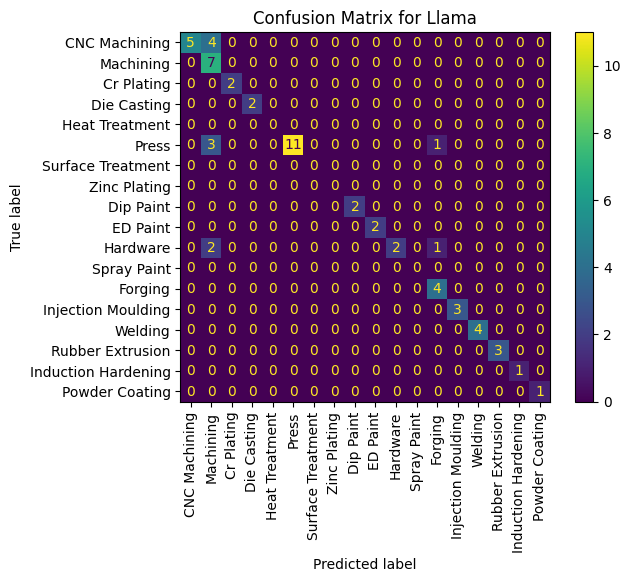


Classification Report for Custom GPT:

                     precision    recall  f1-score   support

      CNC Machining       0.88      0.78      0.82         9
         Cr Plating       1.00      1.00      1.00         3
        Die Casting       1.00      0.50      0.67         2
          Dip Paint       0.00      0.00      0.00         2
           ED Paint       0.50      0.50      0.50         2
            Forging       1.00      1.00      1.00         4
           Hardware       1.00      1.00      1.00         5
     Heat Treatment       1.00      1.00      1.00        10
Induction Hardening       1.00      1.00      1.00         1
 Injection Moulding       1.00      0.75      0.86         4
          Machining       0.75      0.86      0.80         7
     Powder Coating       0.00      0.00      0.00         1
              Press       1.00      1.00      1.00        15
   Rubber Extrusion       1.00      1.00      1.00         3
       Sand Casting       0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


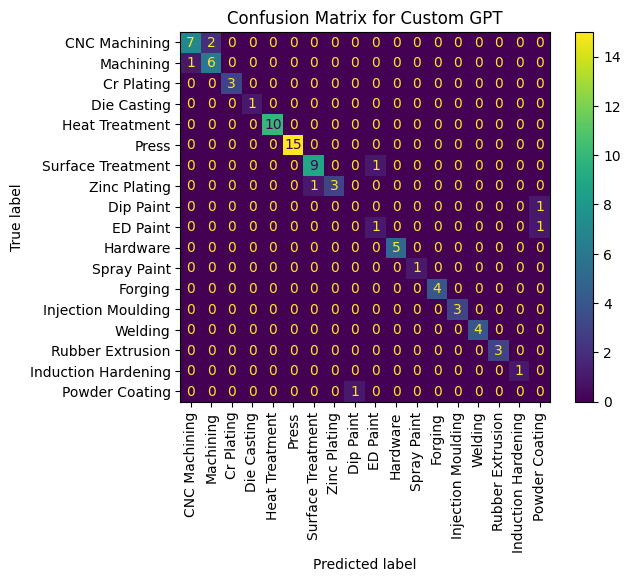

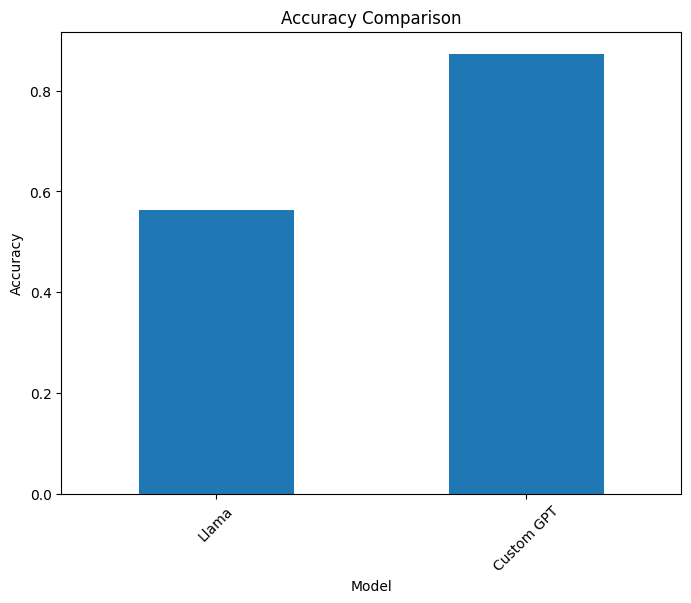

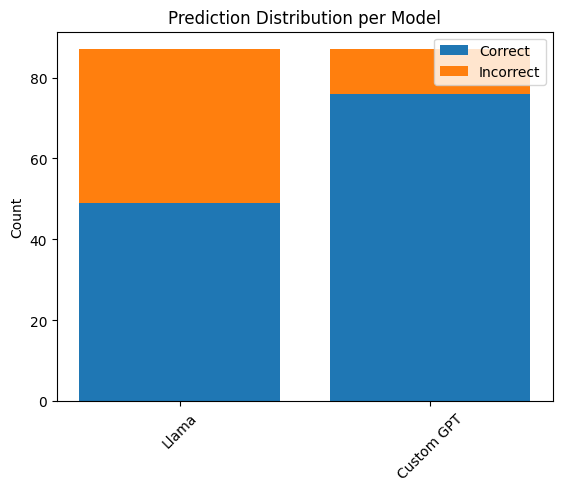

Metrics saved to: /content/drive/My Drive/Tools Project/Iteration 2/model_metrics_iter2.xlsx


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set base directory in Google Drive
base_folder = "/content/drive/My Drive/Tools Project/Iteration 2"
os.makedirs(base_folder, exist_ok=True)  # Ensure the folder exists

# Define file paths
llama_file = os.path.join(base_folder, "llama-3.1-70b_predictions_iter2.xlsx")
custom_gpt_file = os.path.join(base_folder, "custom_gpt_predictions_iter2.xlsx")
ground_truth_file = os.path.join(base_folder, "ground_truth_2.xlsx")

# Load all dataframes
llama_df = pd.read_excel(llama_file)
custom_gpt_df = pd.read_excel(custom_gpt_file)
ground_truth_df = pd.read_excel(ground_truth_file)

# Merge all dataframes on the 'Process' column
comparison_df = ground_truth_df.copy()
comparison_df = comparison_df.merge(llama_df, on="Process", how="left", suffixes=("", "_Llama"))
comparison_df = comparison_df.merge(custom_gpt_df, on="Process", how="left", suffixes=("", "_Custom"))

# Rename columns for clarity
comparison_df.columns = [
    "Process",
    "Ground Truth",
    "Llama Prediction",
    "Custom GPT Prediction",
]

# Save merged file for reference
merged_file = os.path.join(base_folder, "comparison_results.xlsx")
comparison_df.to_excel(merged_file, index=False)
print(f"Comparison results saved to: {merged_file}")

# Metrics dictionary
metrics = {}

# Calculate metrics for each model
for model in ["Llama", "Custom GPT"]:
    predictions = comparison_df[f"{model} Prediction"]
    ground_truth = comparison_df["Ground Truth"]

    # Convert both ground_truth and predictions to strings
    ground_truth = ground_truth.astype(str)
    predictions = predictions.astype(str)  # Convert predictions to strings as well

    # Accuracy
    accuracy = accuracy_score(ground_truth, predictions)
    metrics[model] = {"Accuracy": accuracy}

    # Generate classification report
    print(f"\nClassification Report for {model}:\n")
    print(classification_report(ground_truth, predictions))

    # Confusion Matrix
    cm = confusion_matrix(ground_truth, predictions, labels=ground_truth.unique())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ground_truth.unique())
    disp.plot(cmap="viridis", xticks_rotation=90)
    plt.title(f"Confusion Matrix for {model}")
    plt.show()

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics).T

# Bar plot for accuracy
metrics_df["Accuracy"].plot(kind="bar", figsize=(8, 6), title="Accuracy Comparison", rot=45)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

# Add a correctness column for each model
for model in ["Llama", "Custom GPT"]:
    comparison_df[f"{model} Correct"] = comparison_df[f"{model} Prediction"] == comparison_df["Ground Truth"]

# Correct and Incorrect Counts
correct_counts = {model: comparison_df[f"{model} Correct"].sum() for model in ["Llama", "Custom GPT"]}
incorrect_counts = {model: len(comparison_df) - count for model, count in correct_counts.items()}

# Bar chart for correct vs incorrect predictions
labels = ["Correct", "Incorrect"]
x = range(len(correct_counts))

plt.bar(x, correct_counts.values(), label="Correct")
plt.bar(x, incorrect_counts.values(), bottom=list(correct_counts.values()), label="Incorrect")
plt.xticks(x, correct_counts.keys(), rotation=45)
plt.title("Prediction Distribution per Model")
plt.ylabel("Count")
plt.legend()
plt.show()

# Save metrics to file
metrics_file = os.path.join(base_folder, "model_metrics_iter2.xlsx")
metrics_df.to_excel(metrics_file)
print(f"Metrics saved to: {metrics_file}")


***Custom GPT is opted as best suited for process-to-technology mapping due to highest accuracy.***

**Vendor Recommendation** (Mapped technologies + QCD score)

In [1]:
%%capture
!pip install gradio

In [2]:
import os
import pandas as pd
import logging
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import gradio as gr
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the base directory in Google Drive
base_folder = "/content/drive/My Drive/Tools Project/"
os.makedirs(base_folder, exist_ok=True)  # Ensure the folder exists

# Define file paths for the mapping, vendor, and QCD databases
TECHNOLOGY_LIST_FILE = os.path.join(base_folder, "predicted_technologies.csv")
VENDOR_DATABASE_FILE = os.path.join(base_folder, "Vendor database3.xlsx")
QCD_DATABASE_FILE = os.path.join(base_folder, "Q3.xlsx")

# Configure logging
log_file = os.path.join(base_folder, "vendor_matching_log.txt")
logging.basicConfig(
    filename=log_file,
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s"
)
logging.info("Logging started for Vendor Recommendation System.")

# Load the Technology List, Vendor Database, and QCD Scores
def load_databases():
    try:
        logging.info("Loading Technology List, Vendor Database, and QCD Scores...")

        # Load the technology list (CSV)
        tech_df = pd.read_csv(TECHNOLOGY_LIST_FILE)
        if tech_df.shape[1] == 2:
            tech_df.columns = ['Process', 'Technology']
        else:
            raise Exception("Unexpected number of columns in the technology list CSV. Expected 2 columns.")
        tech_df = tech_df.dropna()

        # Load vendor database (Excel)
        vendor_df = pd.read_excel(VENDOR_DATABASE_FILE, sheet_name='Vendor Capabilities')
        vendor_df = vendor_df.fillna(0)

        # Load QCD scores (Excel)
        qcd_df = pd.read_excel(QCD_DATABASE_FILE, sheet_name='Work', header=1)
        qcd_df.columns = ['Vendor code', 'Vendor', 'Line_Rejection', 'Incoming_Rejection', 'Total_Rejection',
                          'Receiving', 'Defect_Ratio', 'Price_Index', 'Price_Competitive_Index',
                          'Compliance_10D', 'Compliance_20D', 'Compliance_30D', 'QCD_Score',
                          'Baseline', 'Placeholder']

        # Preprocess QCD scores
        relevant_data = qcd_df[['Defect_Ratio', 'Price_Index', 'Compliance_10D',
                                'Compliance_20D', 'Compliance_30D']]
        relevant_data = relevant_data.replace('-', np.nan).astype(float)
        relevant_data = relevant_data.dropna()

        # Normalize QCD data
        scaler = MinMaxScaler()
        normalized_data = scaler.fit_transform(relevant_data)

        # Assign initial weights for baseline QCD score
        weights = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
        baseline_qcd_score = normalized_data.dot(weights)

        # Add baseline QCD scores to the QCD DataFrame
        qcd_df['Baseline_QCD_Score'] = baseline_qcd_score

        logging.info("Databases loaded successfully.")
        return tech_df, vendor_df, qcd_df

    except Exception as e:
        logging.error(f"Error loading databases: {e}")
        raise

# Matching Algorithm with QCD Score Integration
def match_vendors(tech_df, vendor_df, qcd_df):
    try:
        logging.info("Matching vendors...")

        # List of required technologies
        required_technologies = tech_df['Technology'].str.strip().str.lower().tolist()
        logging.info(f"Required technologies: {required_technologies}")

        # Identify the column for Vendor Names dynamically
        vendor_name_col = None
        for col in vendor_df.columns:
            if "vendor" in col.lower() and "name" in col.lower():
                vendor_name_col = col
                break
        if not vendor_name_col:
            raise Exception("Column for 'Vendor Name' not found in Vendor Database.")

        # Identify technology columns
        tech_columns = [col for col in vendor_df.columns if col not in [vendor_name_col]]
        tech_columns_lower = [col.lower().strip() for col in tech_columns]

        matched_vendors = []

        # Iterate through each vendor
        for _, vendor in vendor_df.iterrows():
            capability_score = 0
            matched_techs = []

            for tech in required_technologies:
                if tech in tech_columns_lower:
                    tech_index = tech_columns_lower.index(tech)
                    tech_column_name = tech_columns[tech_index]
                    if vendor[tech_column_name] == 1:
                        capability_score += 1
                        matched_techs.append(tech)

            # Get the vendor's QCD score if available
            qcd_score = qcd_df.loc[qcd_df['Vendor'] == vendor[vendor_name_col], 'Baseline_QCD_Score']
            qcd_score = qcd_score.iloc[0] if not qcd_score.empty else 0

            # Log matched technologies and QCD score
            logging.info(f"Vendor: {vendor[vendor_name_col]}, Matched Technologies: {matched_techs}, QCD Score: {qcd_score}")

            # Append vendor info if at least one technology matches
            if capability_score > 0:
                matched_vendors.append({
                    'Vendor Name': vendor[vendor_name_col],
                    'Matched Technologies': capability_score,
                    'QCD Score': qcd_score
                })

        # Rank Vendors by the number of matched technologies (descending), then QCD score (descending)
        ranked_vendors = sorted(matched_vendors, key=lambda x: (-x['Matched Technologies'], -x['QCD Score']))
        logging.info("Vendor matching completed successfully.")
        return ranked_vendors

    except Exception as e:
        logging.error(f"Error during vendor matching: {e}")
        raise

# Gradio Interface Function
def vendor_matcher():
    try:
        # Load databases
        tech_df, vendor_df, qcd_df = load_databases()

        # Match vendors and rank them
        ranked_vendors = match_vendors(tech_df, vendor_df, qcd_df)

        # Format the output to return the top 5 ranked vendors as a readable string
        if not ranked_vendors:
            return "No matching vendors found."

        top_vendors = "\n".join([
            f"{i + 1}. Vendor: {vendor['Vendor Name']}, Matched Technologies: {vendor['Matched Technologies']}, QCD Score: {vendor['QCD Score']:.2f}"
            for i, vendor in enumerate(ranked_vendors[:5])
        ])

        return top_vendors
    except Exception as e:
        logging.error(f"Error in Gradio interface: {e}")
        return {"error": str(e)}

# Gradio Interface
def gradio_interface():
    interface = gr.Interface(
        fn=vendor_matcher,  # Function to match vendors
        inputs=[],  # No inputs needed since the data is pre-loaded
        outputs=gr.Textbox(label="Top 5 Vendors"),  # Output as text
        title="Vendor Selection System",  # Title of the app
        description="Find the top 5 matching vendors based on their technology capabilities and QCD score."  # Description
    )
    interface.launch(share=True)  # Launch Gradio interface with a public link

# Run Gradio Interface
gradio_interface()


Mounted at /content/drive
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cf513f6a8038c9a608.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
